### exploring manim
https://docs.manim.community/en/stable/index.html

In [1]:
from manim import *

Manim Community v0.17.1

In [2]:
%%manim -v WARNING --disable_caching -qm BannerExample

config.media_width = "75%"
config.media_embed = True

class BannerExample(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        banner_large = ManimBanner(dark_theme=False).scale(0.7)
        self.play(banner_large.create())
        self.play(banner_large.expand())

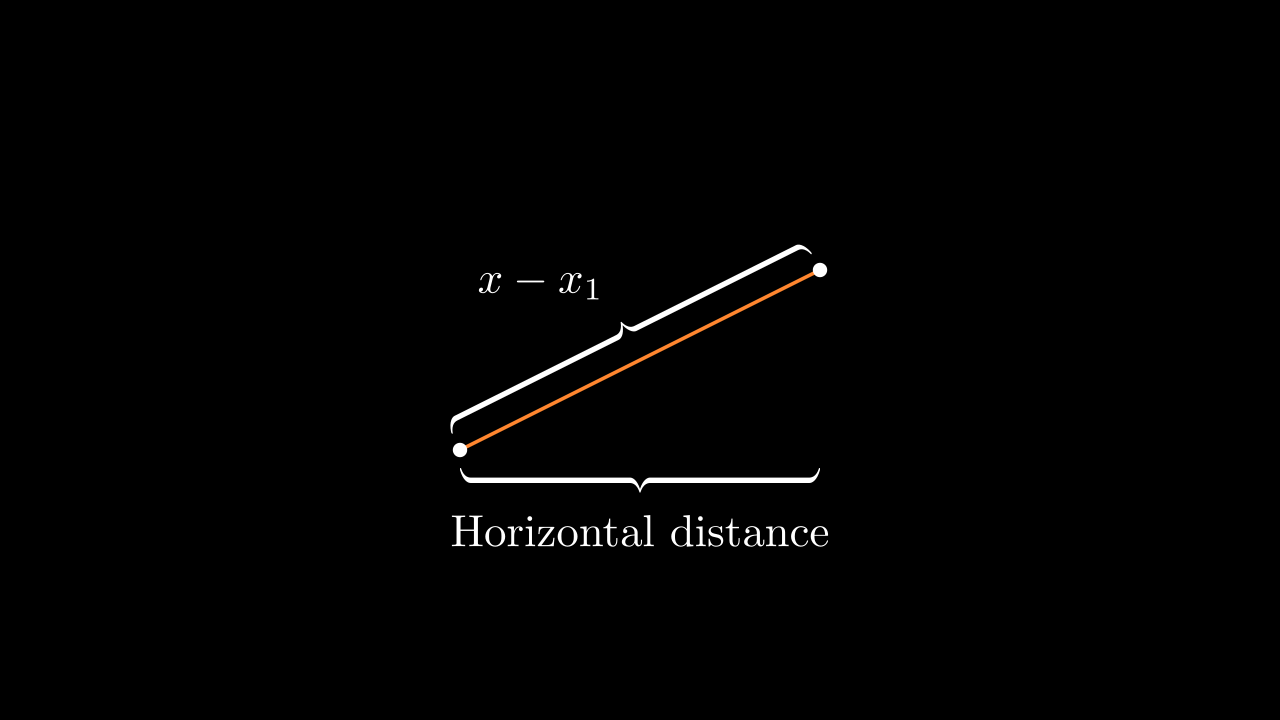

In [7]:
%%manim -v WARNING --disable_caching -qm BraceAnnotation

config.media_width = "75%"
config.media_embed = True

class BraceAnnotation(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
        b1 = Brace(line)
        b1text = b1.get_text("Horizontal distance")
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        b2text = b2.get_tex("x-x_1")
        self.add(line, dot, dot2, b1, b2, b1text, b2text)

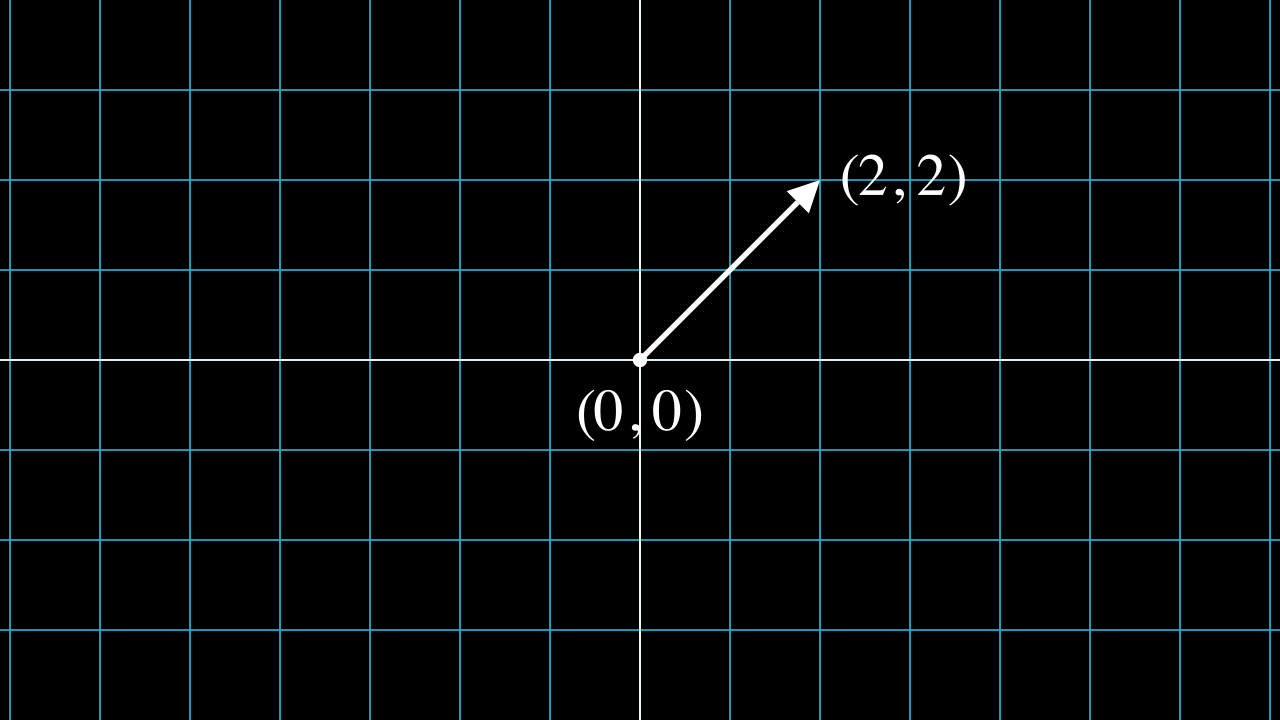

In [8]:
%%manim -v WARNING --disable_caching -qm VectorArrow

class VectorArrow(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)

In [9]:
%%manim -v WARNING --disable_caching -qm BooleanOperations

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))

In [10]:
%%manim -v WARNING --disable_caching -qm MovingAround


class MovingAround(Scene):
    def construct(self):
        square = Square(color=BLUE, fill_opacity=1)

        self.play(square.animate.shift(LEFT))
        self.play(square.animate.set_fill(ORANGE))
        self.play(square.animate.scale(0.3))
        self.play(square.animate.rotate(0.4))

In [11]:
%%manim -v WARNING --disable_caching -qm MovingAngle

class MovingAngle(Scene):
    def construct(self):
        rotation_center = LEFT

        theta_tracker = ValueTracker(110)
        line1 = Line(LEFT, RIGHT)
        line_moving = Line(LEFT, RIGHT)
        line_ref = line_moving.copy()
        line_moving.rotate(
            theta_tracker.get_value() * DEGREES, about_point=rotation_center
        )
        a = Angle(line1, line_moving, radius=0.5, other_angle=False)
        tex = MathTex(r"\theta").move_to(
            Angle(
                line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
            ).point_from_proportion(0.5)
        )

        self.add(line1, line_moving, a, tex)
        self.wait()

        line_moving.add_updater(
            lambda x: x.become(line_ref.copy()).rotate(
                theta_tracker.get_value() * DEGREES, about_point=rotation_center
            )
        )

        a.add_updater(
            lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        )
        tex.add_updater(
            lambda x: x.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
                ).point_from_proportion(0.5)
            )
        )

        self.play(theta_tracker.animate.set_value(40))
        self.play(theta_tracker.animate.increment_value(140))
        self.play(tex.animate.set_color(RED), run_time=0.5)
        self.play(theta_tracker.animate.set_value(350))

In [12]:
%%manim -v WARNING --disable_caching -qm MovingGroupToDestination

class MovingGroupToDestination(Scene):
    def construct(self):
        group = VGroup(Dot(LEFT), Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2 * RIGHT)).scale(1.4)
        dest = Dot([4, 3, 0], color=YELLOW)
        self.add(group, dest)
        self.play(group.animate.shift(dest.get_center() - group[2].get_center()))
        self.wait(0.5)

In [13]:
%%manim -v WARNING --disable_caching -qm MovingFrameBox

class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()
        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()

In [15]:
%%manim -v WARNING --disable_caching -qm PointWithTrace

class PointWithTrace(Scene):
    def construct(self):
        path = VMobject()
        dot = Dot()
        path.set_points_as_corners([dot.get_center(), dot.get_center()])
        def update_path(path):
            previous_path = path.copy()
            previous_path.add_points_as_corners([dot.get_center()])
            path.become(previous_path)
        path.add_updater(update_path)
        self.add(path, dot)
        self.play(Rotating(dot, radians=PI, about_point=RIGHT, run_time=2))
        self.wait()
        self.play(dot.animate.shift(UP))
        self.play(dot.animate.shift(LEFT))
        self.wait()

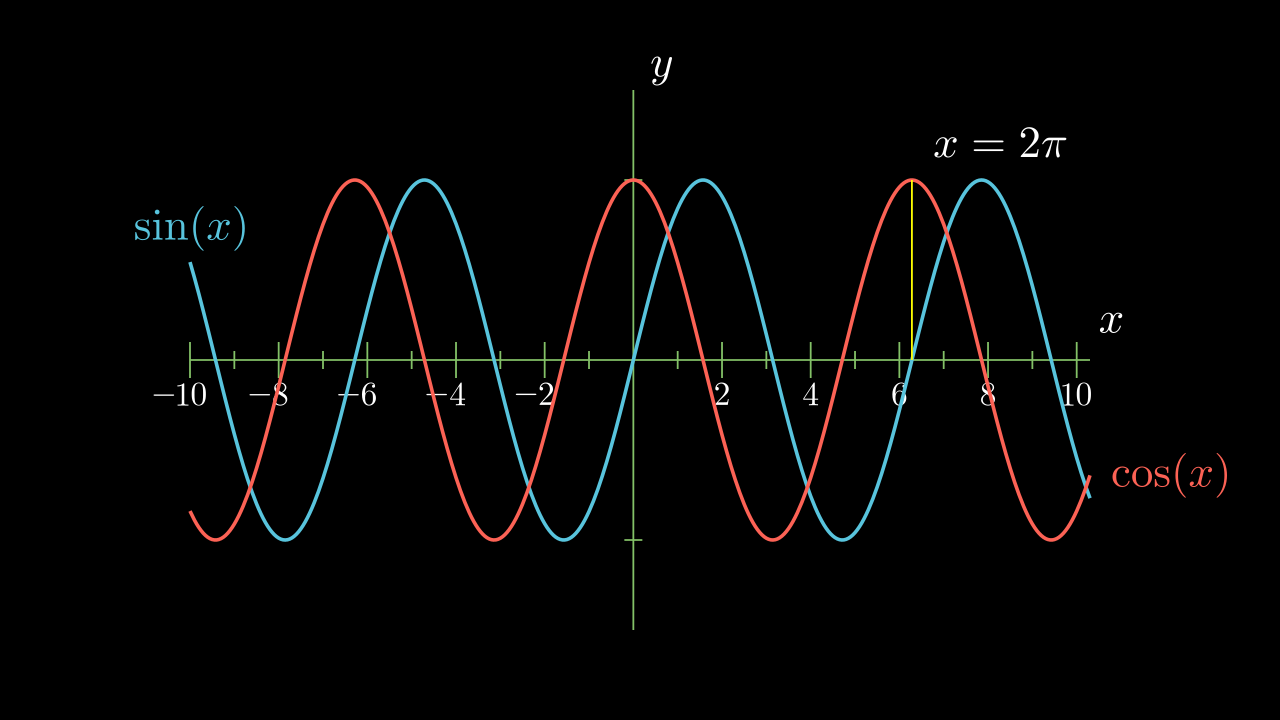

In [17]:
%%manim -v WARNING --disable_caching -qm SinAndCosFunctionPlot

class SinAndCosFunctionPlot(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },
            tips=False,
        )
        axes_labels = axes.get_axis_labels()
        sin_graph = axes.plot(lambda x: np.sin(x), color=BLUE)
        cos_graph = axes.plot(lambda x: np.cos(x), color=RED)

        sin_label = axes.get_graph_label(
            sin_graph, "\\sin(x)", x_val=-10, direction=UP / 2
        )
        cos_label = axes.get_graph_label(cos_graph, label="\\cos(x)")

        vert_line = axes.get_vertical_line(
            axes.i2gp(TAU, cos_graph), color=YELLOW, line_func=Line
        )
        line_label = axes.get_graph_label(
            cos_graph, "x=2\pi", x_val=TAU, direction=UR, color=WHITE
        )

        plot = VGroup(axes, sin_graph, cos_graph, vert_line)
        labels = VGroup(axes_labels, sin_label, cos_label, line_label)
        self.add(plot, labels)

In [18]:
%%manim -v WARNING --disable_caching -qm ArgMinExample

class ArgMinExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False}
        )
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")

        t = ValueTracker(0)

        def func(x):
            return 2 * (x - 5) ** 2
        graph = ax.plot(func, color=MAROON)

        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)

        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()

        self.add(ax, labels, graph, dot)
        self.play(t.animate.set_value(x_space[minimum_index]))
        self.wait()

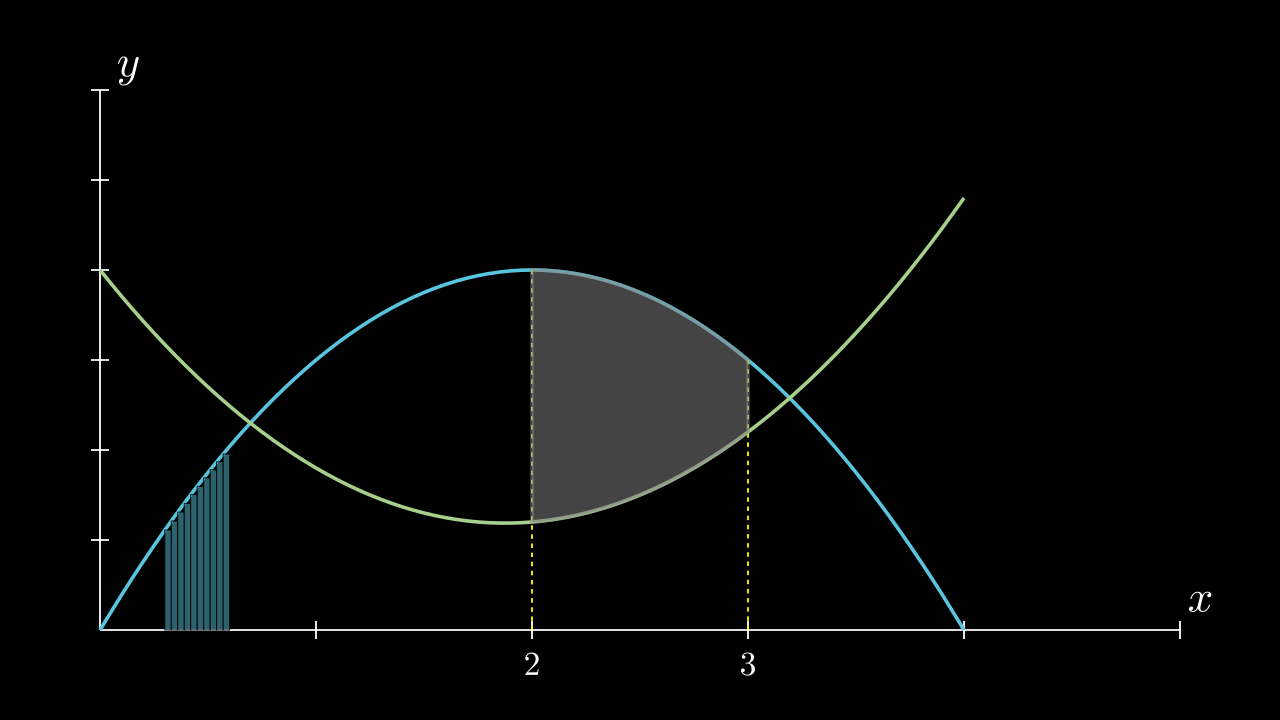

In [19]:
%%manim -v WARNING --disable_caching -qm GraphAreaPlot


class GraphAreaPlot(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5],
            y_range=[0, 6],
            x_axis_config={"numbers_to_include": [2, 3]},
            tips=False,
        )

        labels = ax.get_axis_labels()

        curve_1 = ax.plot(lambda x: 4 * x - x ** 2, x_range=[0, 4], color=BLUE_C)
        curve_2 = ax.plot(
            lambda x: 0.8 * x ** 2 - 3 * x + 4,
            x_range=[0, 4],
            color=GREEN_B,
        )

        line_1 = ax.get_vertical_line(ax.input_to_graph_point(2, curve_1), color=YELLOW)
        line_2 = ax.get_vertical_line(ax.i2gp(3, curve_1), color=YELLOW)

        riemann_area = ax.get_riemann_rectangles(curve_1, x_range=[0.3, 0.6], dx=0.03, color=BLUE, fill_opacity=0.5)
        area = ax.get_area(curve_2, [2, 3], bounded_graph=curve_1, color=GREY, opacity=0.5)

        self.add(ax, labels, curve_1, curve_2, line_1, line_2, riemann_area, area)

In [20]:
%%manim -v WARNING --disable_caching -qm PolygonOnAxes


class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))

In [23]:
%%manim -v WARNING --disable_caching -qm FollowingGraphCamera



class FollowingGraphCamera(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # create the axes and the curve
        ax = Axes(x_range=[-1, 10], y_range=[-1, 10])
        graph = ax.plot(lambda x: np.sin(x), color=BLUE, x_range=[0, 3 * PI])

        # create dots based on the graph
        moving_dot = Dot(ax.i2gp(graph.t_min, graph), color=ORANGE)
        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))

        self.add(ax, graph, dot_1, dot_2, moving_dot)
        self.play(self.camera.frame.animate.scale(0.5).move_to(moving_dot))

        def update_curve(mob):
            mob.move_to(moving_dot.get_center())

        self.camera.frame.add_updater(update_curve)
        self.play(MoveAlongPath(moving_dot, graph, rate_func=linear))
        self.camera.frame.remove_updater(update_curve)

        self.play(Restore(self.camera.frame))

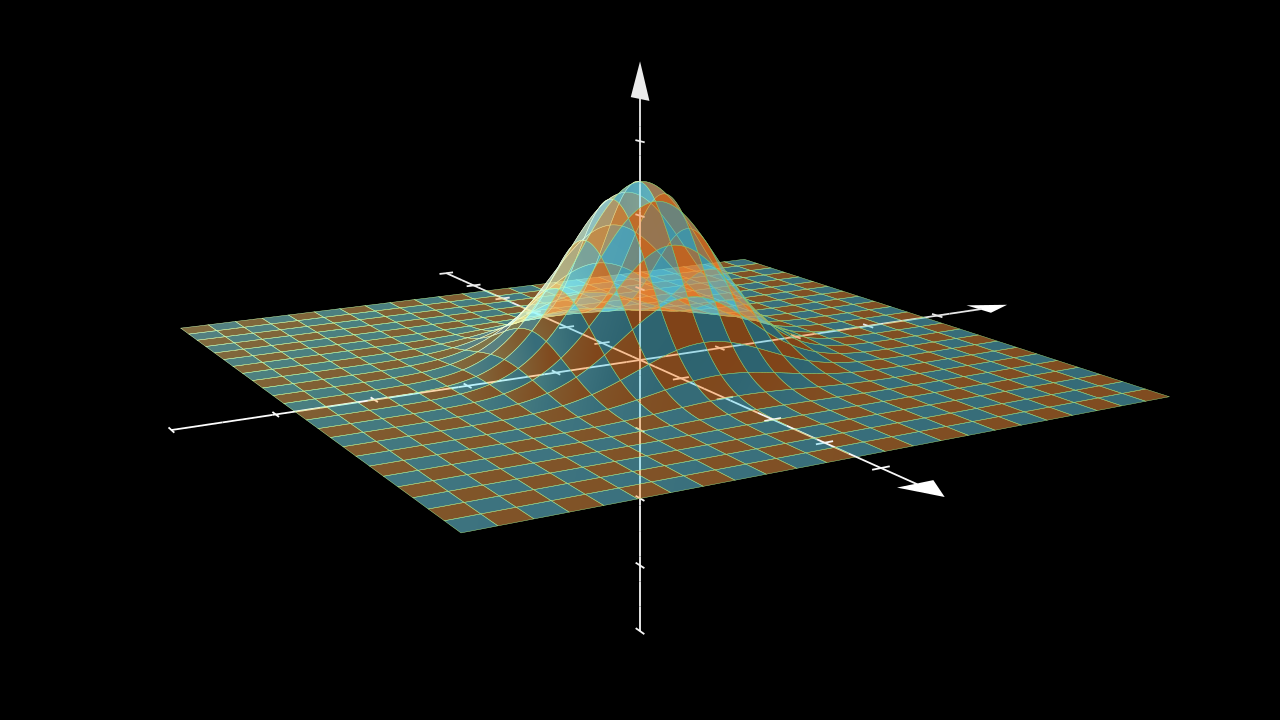

In [29]:
%%manim -v WARNING --disable_caching -qm ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)

In [30]:
%%manim -v WARNING --disable_caching -qm SineCurveUnitCircle

class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)